# `Logistic Regression -------------------------------`

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [236]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [237]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Rownumber, CustermerId and Surname are of no use 

In [238]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [239]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [240]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### HasCrCard, IsActiveMember and Exited should be of datatype object

In [241]:
conversion_columns = ['HasCrCard','IsActiveMember','Exited']
for cols in conversion_columns:
    data[cols] = data[cols].astype('object')
    

In [242]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [243]:
target = 'Exited'
cont_columns = data.select_dtypes(['int64','float64']).columns
cat_columns = list(filter(lambda x: x!='Exited',data.select_dtypes('object').columns))

In [244]:
cont_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [245]:
cat_columns

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [246]:
target

'Exited'

In [247]:
for col in cat_columns:
    print(f'Column unique {col} ==>> {data[col].nunique()}')

Column unique Geography ==>> 3
Column unique Gender ==>> 2
Column unique HasCrCard ==>> 2
Column unique IsActiveMember ==>> 2


### Continious vs Target ( T-test ) 

CreditScore => t-test result => Ttest_indResult(statistic=2.7100778888729833, pvalue=0.006738213892192373)

Age => t-test result => Ttest_indResult(statistic=-29.76681499437077, pvalue=1.2399313093427738e-186)

Tenure => t-test result => Ttest_indResult(statistic=1.4000584366735584, pvalue=0.16152684949473256)

Balance => t-test result => Ttest_indResult(statistic=-11.936240300013841, pvalue=1.2755633191525477e-32)

NumOfProducts => t-test result => Ttest_indResult(statistic=4.786984698423093, pvalue=1.717333004804293e-06)

EstimatedSalary => t-test result => Ttest_indResult(statistic=-1.2096536380192642, pvalue=0.22644042802223346)



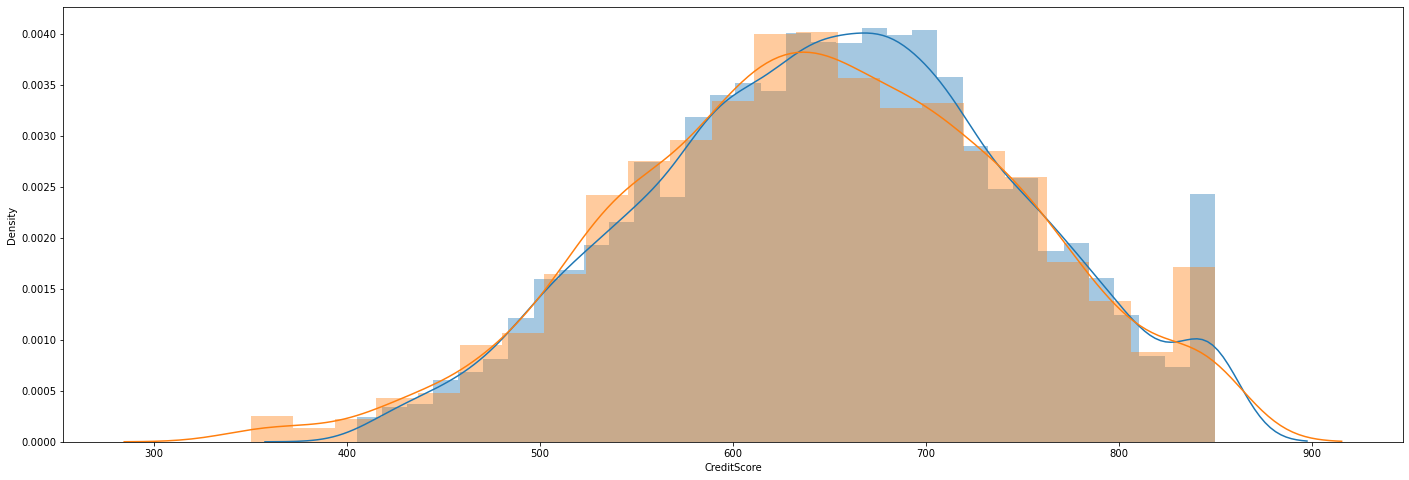

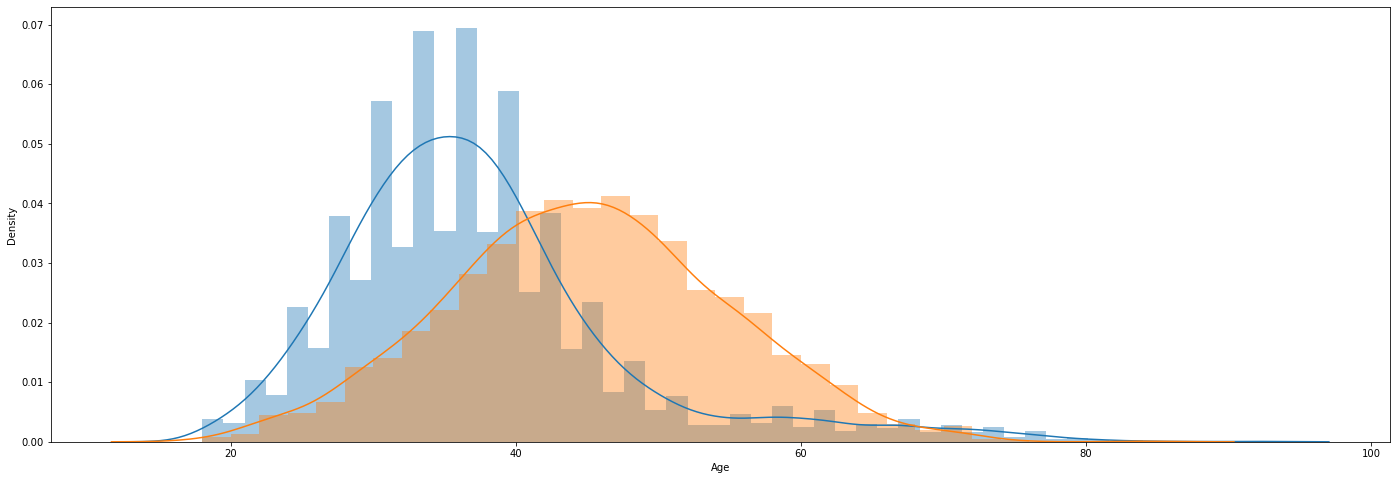

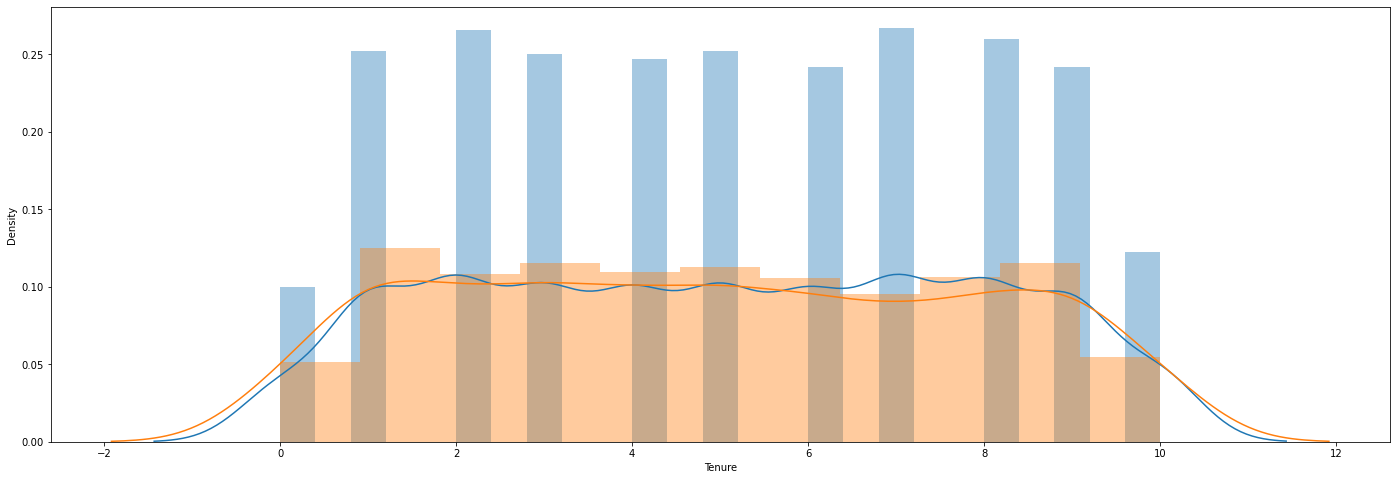

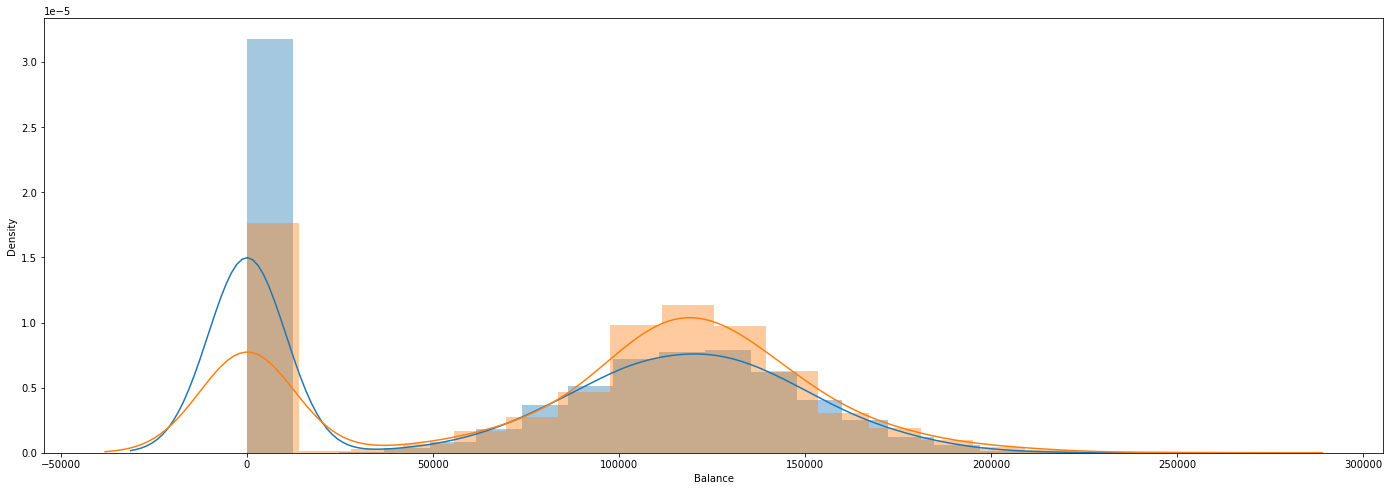

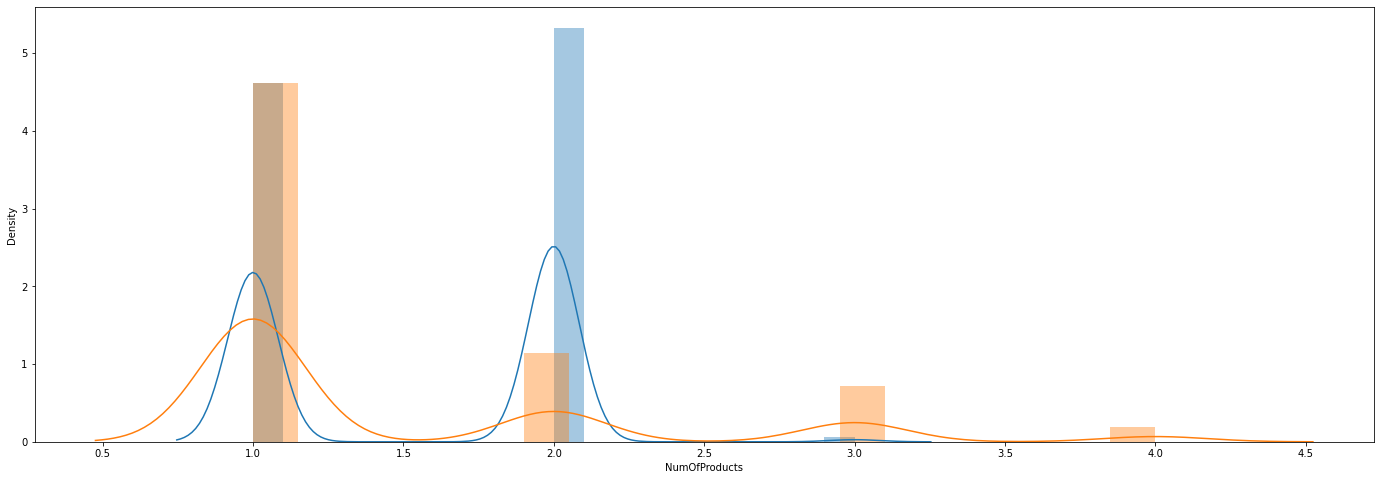

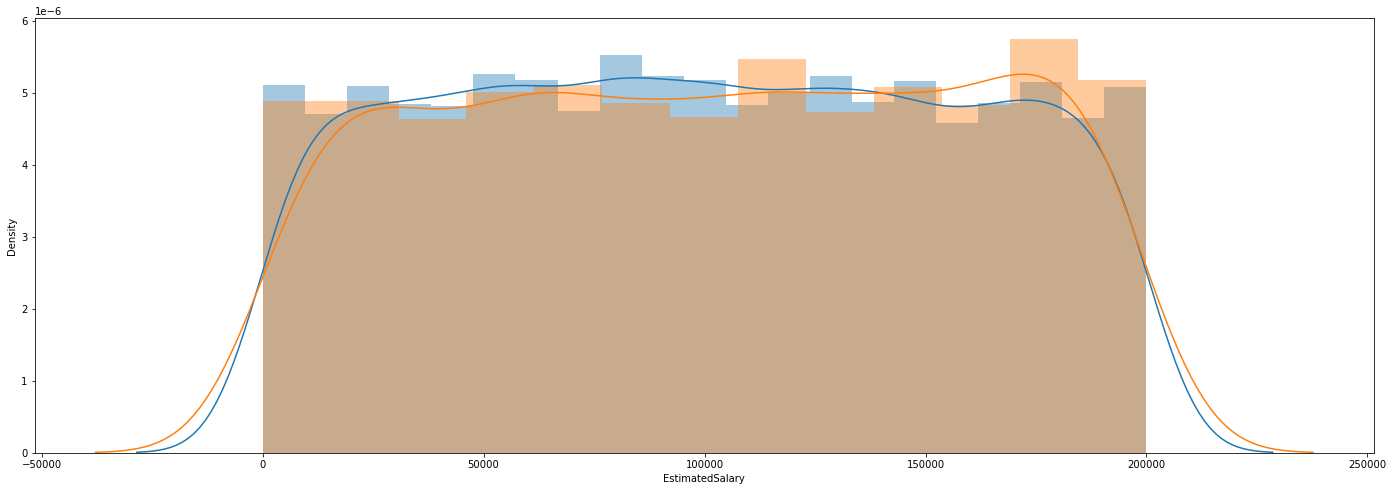

In [248]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

def t_test_plot(col,grp1,grp2):
    plt.figure(figsize=(24,8))
    sns.distplot(grp1)
    sns.distplot(grp2)
    t_test_resutl = ttest_ind(grp1,grp2)
    print(f"{col} => t-test result => {t_test_resutl}\n")

    
for col in cont_columns:
    grp1 = data.loc[data[target]==0,col]
    grp2 = data.loc[data[target]==1,col]
    t_test_plot(col,grp1,grp2)

`EstimatedSalary and Tenure are not related to Exited, so we should drop them`

### Categorical vs Target ( chi square test ) 

In [249]:
from scipy.stats import chi2_contingency

def chisq_test(target,independent_col,data):
    two_way = pd.crosstab(data[target],data[independent_col])
    chi_test_result = chi2_contingency(two_way)
    print(f'{independent_col} => chi-square result p-values => {chi_test_result[1]}')

In [250]:
for col in cat_columns:
    chisq_test(target,col,data)

Geography => chi-square result p-values => 3.830317605354266e-66
Gender => chi-square result p-values => 2.2482100097131755e-26
HasCrCard => chi-square result p-values => 0.49237236141554686
IsActiveMember => chi-square result p-values => 8.785858269303703e-55


`HasCrCard is not related to Exited, we should drop it`

### Drop columns which are not related to target

In [251]:
not_related = ['HasCrCard','EstimatedSalary','Tenure']
data.drop(not_related,axis=1,inplace=True)

In [252]:
data.head()

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0          619    France  Female   42       0.00              1   
1          608     Spain  Female   41   83807.86              1   
2          502    France  Female   42  159660.80              3   
3          699    France  Female   39       0.00              2   
4          850     Spain  Female   43  125510.82              1   

  IsActiveMember Exited  
0              1      1  
1              1      0  
2              0      1  
3              0      0  
4              1      0

### Split the data

In [253]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [254]:
X

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0             619    France  Female   42       0.00              1   
1             608     Spain  Female   41   83807.86              1   
2             502    France  Female   42  159660.80              3   
3             699    France  Female   39       0.00              2   
4             850     Spain  Female   43  125510.82              1   
...           ...       ...     ...  ...        ...            ...   
9995          771    France    Male   39       0.00              2   
9996          516    France    Male   35   57369.61              1   
9997          709    France  Female   36       0.00              1   
9998          772   Germany    Male   42   75075.31              2   
9999          792    France  Female   28  130142.79              1   

     IsActiveMember  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1  
...             ...  
9995              0  
9996              1  
9997              1  
9998              0  
9999              0  

[10000 rows x 7 columns]

In [255]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: object

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### I cannot use this to fit my model, I have to do encoding

### `Label Encoder`

In [257]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X_train['Gender'])
X_train.loc[:,'Gender'] = le.transform(X_train['Gender'])
X_test.loc[:,'Gender'] = le.transform(X_test['Gender'])

In [258]:
X_train

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
9254          686    France       1   32       0.00              2   
1561          632   Germany       1   42  119624.60              2   
1670          559     Spain       1   24  114739.92              1   
6087          561    France       0   27  135637.00              1   
6669          517    France       1   56  142147.32              1   
...           ...       ...     ...  ...        ...            ...   
5734          768    France       1   54   69712.74              1   
5191          682    France       0   58       0.00              1   
5390          735    France       0   38       0.00              3   
860           667    France       1   43  190227.46              1   
7270          697   Germany       1   51  147910.30              1   

     IsActiveMember  
9254              1  
1561              1  
1670              0  
6087              0  
6669              0  
...             ...  
5734              1  
5191              1  
5390              0  
860               0  
7270              1  

[8000 rows x 7 columns]

### `Label Binarizer / One Hot Encoding / dummy variable`

In [259]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(data['Geography'])

LabelBinarizer()

### to explain three categories two columns are sufficient, you can drop any

In [260]:
encoded_df = pd.DataFrame(lb.transform(X_train['Geography']),columns=lb.classes_)
encoded_df.drop(['Germany'],axis=1,inplace=True)

In [261]:
X_train = pd.concat([X_train.reset_index(),encoded_df],axis=1)
X_train

index  CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0      9254          686    France       1   32       0.00              2   
1      1561          632   Germany       1   42  119624.60              2   
2      1670          559     Spain       1   24  114739.92              1   
3      6087          561    France       0   27  135637.00              1   
4      6669          517    France       1   56  142147.32              1   
...     ...          ...       ...     ...  ...        ...            ...   
7995   5734          768    France       1   54   69712.74              1   
7996   5191          682    France       0   58       0.00              1   
7997   5390          735    France       0   38       0.00              3   
7998    860          667    France       1   43  190227.46              1   
7999   7270          697   Germany       1   51  147910.30              1   

     IsActiveMember  France  Spain  
0                 1       1      0  
1                 1       0      0  
2                 0       0      1  
3                 0       1      0  
4                 0       1      0  
...             ...     ...    ...  
7995              1       1      0  
7996              1       1      0  
7997              0       1      0  
7998              0       1      0  
7999              1       0      0  

[8000 rows x 10 columns]

In [262]:
X_train.drop(['Geography','index'],axis=1,inplace=True)

In [263]:
X_train

CreditScore  Gender  Age    Balance  NumOfProducts IsActiveMember  \
0             686       1   32       0.00              2              1   
1             632       1   42  119624.60              2              1   
2             559       1   24  114739.92              1              0   
3             561       0   27  135637.00              1              0   
4             517       1   56  142147.32              1              0   
...           ...     ...  ...        ...            ...            ...   
7995          768       1   54   69712.74              1              1   
7996          682       0   58       0.00              1              1   
7997          735       0   38       0.00              3              0   
7998          667       1   43  190227.46              1              0   
7999          697       1   51  147910.30              1              1   

      France  Spain  
0          1      0  
1          0      0  
2          0      1  
3          1      0  
4          1      0  
...      ...    ...  
7995       1      0  
7996       1      0  
7997       1      0  
7998       1      0  
7999       0      0  

[8000 rows x 8 columns]

### Similarly this to be done for test data

In [264]:
encoded_df = pd.DataFrame(lb.transform(X_test['Geography']),columns=lb.classes_)
X_test = pd.concat([X_test.reset_index(),encoded_df],axis=1)
X_test.drop(['Geography','Germany','index'],axis=1,inplace=True)

In [265]:
X_test

CreditScore  Gender  Age    Balance  NumOfProducts IsActiveMember  \
0             596       1   32   96709.07              2              0   
1             623       1   43       0.00              2              1   
2             601       0   44       0.00              2              0   
3             506       1   59  119152.10              2              1   
4             560       0   27  124995.98              1              1   
...           ...     ...  ...        ...            ...            ...   
1995          602       0   53   98268.84              1              1   
1996          609       1   25       0.00              1              1   
1997          730       0   47       0.00              1              0   
1998          692       1   29       0.00              1              0   
1999          628       1   39  115341.19              1              1   

      France  Spain  
0          0      0  
1          1      0  
2          0      1  
3          0      0  
4          0      1  
...      ...    ...  
1995       0      0  
1996       1      0  
1997       1      0  
1998       1      0  
1999       0      0  

[2000 rows x 8 columns]

### Now Scaling of the data

In [266]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[['CreditScore','Age','Balance']])

StandardScaler()

In [267]:
X_train[['CreditScore','Age','Balance']] = sc.transform(X_train[['CreditScore','Age','Balance']])
X_test[['CreditScore','Age','Balance']] = sc.transform(X_test[['CreditScore','Age','Balance']])

In [268]:
X_train

CreditScore  Gender       Age   Balance  NumOfProducts IsActiveMember  \
0        0.356500       1 -0.655786 -1.218471              2              1   
1       -0.203898       1  0.294938  0.696838              2              1   
2       -0.961472       1 -1.416365  0.618629              1              0   
3       -0.940717       0 -1.131148  0.953212              1              0   
4       -1.397337       1  1.625953  1.057449              1              0   
...           ...     ...       ...       ...            ...            ...   
7995     1.207474       1  1.435808 -0.102301              1              1   
7996     0.314989       0  1.816097 -1.218471              1              1   
7997     0.865009       0 -0.085351 -1.218471              3              0   
7998     0.159323       1  0.390011  1.827259              1              0   
7999     0.470655       1  1.150590  1.149720              1              1   

      France  Spain  
0          1      0  
1          0      0  
2          0      1  
3          1      0  
4          1      0  
...      ...    ...  
7995       1      0  
7996       1      0  
7997       1      0  
7998       1      0  
7999       0      0  

[8000 rows x 8 columns]

### Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.astype(int))

LogisticRegression()

In [270]:
y_pred = model.predict(X_test)

In [271]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.77343875, 0.22656125],
       [0.9270735 , 0.0729265 ],
       [0.6834002 , 0.3165998 ],
       ...,
       [0.65328361, 0.34671639],
       [0.91898443, 0.08101557],
       [0.83981054, 0.16018946]])

In [272]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1541   66]
 [ 311   82]]
Accuracy => 0.8115


### Here we get only 81% accuracy,Now I am going to improvise accuracy, for that I have to go for univariate analysis
### Manual Threshold Finding

<AxesSubplot:xlabel='Exited', ylabel='count'>

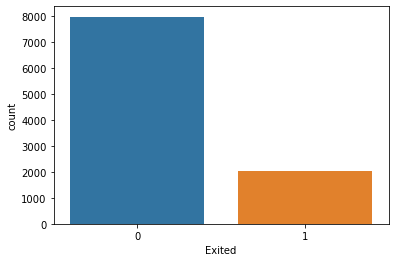

In [273]:
import seaborn as sns
sns.countplot(data['Exited'])

### We want probabilities of .5 to give model the fair chance, but the actual probabilities are

In [274]:
data['Exited'].value_counts() / data.shape[0]

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [275]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.77343875, 0.22656125],
       [0.9270735 , 0.0729265 ],
       [0.6834002 , 0.3165998 ],
       ...,
       [0.65328361, 0.34671639],
       [0.91898443, 0.08101557],
       [0.83981054, 0.16018946]])

### We manually fixed .796 as threshold

In [276]:
import numpy as np
y_pred = np.where(y_pred_proba[:,1]<.796,0,1)

In [277]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1604    3]
 [ 386    7]]
Accuracy => 0.8055


### but it reduced accuracy, so adjust probaibility manually to get better accuracy
### `Finding adjust threshold to get better accuracy`

In [278]:
y_pred = np.where(y_pred_proba[:,1]<.78,0,1)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1604    3]
 [ 384    9]]
Accuracy => 0.8065


In [279]:
y_pred = np.where(y_pred_proba[:,1]<.75,0,1)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1603    4]
 [ 382   11]]
Accuracy => 0.807


In [280]:
y_pred = np.where(y_pred_proba[:,1]<.70,0,1)
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1597   10]
 [ 374   19]]
Accuracy => 0.808


## `ROC and AUC`
![](https://www.kdnuggets.com/wp-content/uploads/nagesh-metrics-1.png)
![](https://keytodatascience.com/wp-content/uploads/2019/09/accuracy.jpg)

### Accuracy

In [281]:
accuracy = (19+1597)/len(y_test)
accuracy

0.808

### True positive rate / Recall / Sensitivity = TP / ( FN + TP )

In [282]:
true_positive_rate = 19 / (374+19)
true_positive_rate

0.04834605597964377

### False positive rate = FP / ( TN + FP )

In [283]:
false_positive_rate = 10 / (1597+10)
false_positive_rate

0.006222775357809583

### `Finding Threshold using ROC and checking algo performance by AUC`

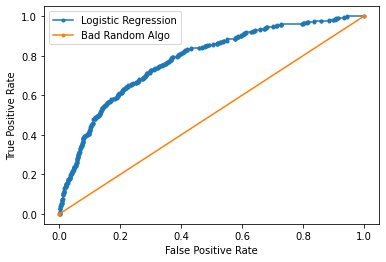

AUC is => 0.7787700439077764


In [284]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


ns_prob = [0 for _ in range(len(y_test))]  # bad algo
ns_fpr,ns_tpr,thresholds_1 = roc_curve(y_test.astype(int),ns_prob)

lr_prob = y_pred_proba[:,1]
lr_auc = roc_auc_score(y_test.astype(int),lr_prob)   # logistic regression
lr_fpr,lr_tpr,thesholds_2 = roc_curve(y_test.astype(int),lr_prob)

# plotting
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC is => {lr_auc}')

In [285]:
thresholds_1

array([1, 0])

In [286]:
thesholds_2

array([1.92207688, 0.92207688, 0.86887367, 0.83174409, 0.82794247,
       0.78148675, 0.77534753, 0.75913381, 0.74991171, 0.72594699,
       0.72362128, 0.71225512, 0.70768365, 0.70375175, 0.70096173,
       0.6998165 , 0.68715935, 0.68678589, 0.68531529, 0.67797922,
       0.67480474, 0.6602765 , 0.65415205, 0.65342123, 0.65136943,
       0.63531752, 0.63456397, 0.63055445, 0.62426775, 0.62303215,
       0.62265459, 0.61674618, 0.61066627, 0.60819264, 0.60388239,
       0.58857793, 0.58367199, 0.58052139, 0.57243734, 0.572257  ,
       0.5721055 , 0.57099319, 0.56810717, 0.56804393, 0.56192973,
       0.55712814, 0.55712067, 0.55671395, 0.55381687, 0.55261199,
       0.55124636, 0.54840384, 0.54761071, 0.54096414, 0.53593511,
       0.53484024, 0.53460365, 0.53453276, 0.52820521, 0.52667325,
       0.52648547, 0.52422107, 0.52317016, 0.52248389, 0.51812809,
       0.5138529 , 0.51076392, 0.50924189, 0.50509782, 0.50387028,
       0.50183963, 0.50155256, 0.49886385, 0.49020112, 0.48830

In [287]:
y_pred = np.where(y_pred_proba[:,1]<.70,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.808


In [288]:
y_pred = np.where(y_pred_proba[:,1]<.60,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.8135


In [289]:
from sklearn.metrics import precision_score
print(f'Precision => {precision_score(y_test.astype(int),y_pred)}')

Precision => 0.6388888888888888


In [290]:
from sklearn.metrics import recall_score
print(f'Recall => {recall_score(y_test.astype(int),y_pred)}')

Recall => 0.11704834605597965


### `.60 to .80 you can choose any value to find best accuracy`

### Precision = TP / ( TP + FP ) 
### F1 score = 2 * Precision * Recall / ( Precision + Recall )

### `Formulae list`:
<br />

![](https://www.researchgate.net/publication/325567208/figure/tbl4/AS:668664739151911@1536433505975/Classification-performance-metrics-based-on-the-confusion-matrix.png)

## `Finding threshold using LogLoss[Don't use this method], only for reference (MLE)`

In [291]:
class threshold:
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        return 0

In [292]:
from sklearn.metrics import log_loss

In [293]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [309]:
lr_prob = y_pred_proba[:,1]
different_threshold = np.linspace(0,1,num=10)
pre = threshold()
log_losses = []
for t in different_threshold:
    pre.th = t
    yy = pd.Series(lr_prob)
    y_pred = yy.apply(pre.predict_threshold)
    loss = log_loss(y_test.astype(int),y_pred.astype(int))
    log_losses.append(loss)

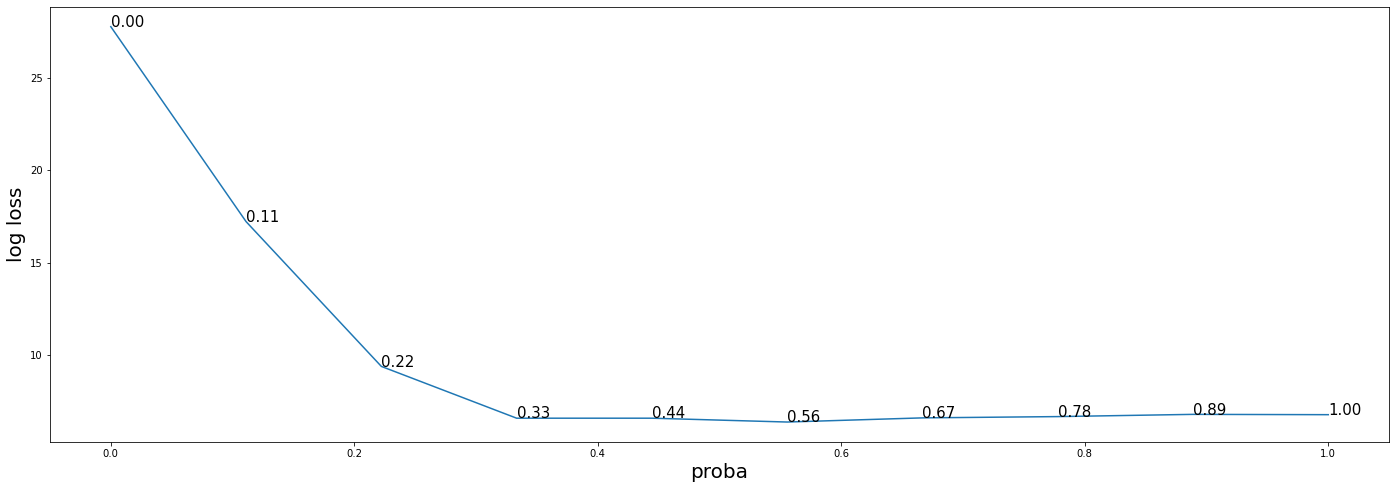

In [312]:
plt.figure(figsize=(24,8))
plt.plot(different_threshold,log_losses)

for i,p in enumerate(different_threshold):
    plt.text(different_threshold[i],log_losses[i],"%0.2f"%(p),fontsize=15)

plt.xlabel("proba",fontsize=20)
plt.ylabel("log loss",fontsize=20)
plt.show()

In [301]:
index = np.array(log_losses).argmin()   # best threshold
different_threshold[index]

0.5714285714285714

### Fit the model

In [302]:
y_pred = np.where(y_pred_proba[:,1]<0.5714285714285714,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.814


In [305]:
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[1573   34]
 [ 338   55]]


In [303]:
from sklearn.metrics import precision_score
print(f'Precision => {precision_score(y_test.astype(int),y_pred)}')

Precision => 0.6179775280898876


In [304]:
from sklearn.metrics import recall_score
print(f'Recall => {recall_score(y_test.astype(int),y_pred)}')

Recall => 0.13994910941475827


## `End -------------------------`